In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [3]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish_D4_I7000_F9000/TPath_300_finish_data_D4.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,300,7000,9000,532.25
1,0.0000,-0.00192,300,7000,9000,565.57
2,0.0000,-0.00184,300,7000,9000,597.71
3,0.0000,-0.00176,300,7000,9000,628.64
4,0.0000,-0.00168,300,7000,9000,658.22
...,...,...,...,...,...,...
1066,0.0024,0.00168,300,7000,9000,643.44
1067,0.0024,0.00176,300,7000,9000,605.59
1068,0.0024,0.00184,300,7000,9000,546.94
1069,0.0024,0.00192,300,7000,9000,487.60


In [4]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.0000,-0.00200,532.25
1,0.0000,-0.00192,565.57
2,0.0000,-0.00184,597.71
3,0.0000,-0.00176,628.64
4,0.0000,-0.00168,658.22
...,...,...,...
1066,0.0024,0.00168,643.44
1067,0.0024,0.00176,605.59
1068,0.0024,0.00184,546.94
1069,0.0024,0.00192,487.60


In [5]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

      X-Koordinate  Y-Koordinate  Temperatur
184        0.00036       0.00048      886.60
572        0.00132      -0.00112      806.92
309        0.00072      -0.00176      629.84
930        0.00216      -0.00104      770.86
711        0.00156       0.00184      522.14
...            ...           ...         ...
330        0.00072      -0.00008      902.23
466        0.00108      -0.00144      738.36
121        0.00024      -0.00048      902.11
1044       0.00240      -0.00008      753.13
860        0.00192       0.00152      666.93

[1071 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,0.00036,0.00048,886.60
1,0.00132,-0.00112,806.92
2,0.00072,-0.00176,629.84
3,0.00216,-0.00104,770.86
4,0.00156,0.00184,522.14
...,...,...,...
1066,0.00072,-0.00008,902.23
1067,0.00108,-0.00144,738.36
1068,0.00024,-0.00048,902.11
1069,0.00240,-0.00008,753.13


In [6]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [7]:
X

,X-Koordinate,Y-Koordinate
0,0.00036,0.00048
1,0.00132,-0.00112
2,0.00072,-0.00176
3,0.00216,-0.00104
4,0.00156,0.00184
...,...,...
1066,0.00072,-0.00008
1067,0.00108,-0.00144
1068,0.00024,-0.00048
1069,0.00240,-0.00008


In [8]:
y

0       886.60
1       806.92
2       629.84
3       770.86
4       522.14
         ...  
1066    902.23
1067    738.36
1068    902.11
1069    753.13
1070    666.93
Name: Temperatur, Length: 1071, dtype: float64

In [9]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [10]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze unterschiedliche Skalierungsparameter

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [11]:
X_train_scaled

array([[0.35, 0.88],
       [0.75, 0.88],
       [0.85, 0.02],
       ...,
       [0.2 , 0.86],
       [1.  , 0.52],
       [0.8 , 0.04]])

In [12]:
y_train_scaled.max()

1.0

In [13]:
# Lernplan erstellen
#initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [20]:


# Netzwerkarchitektur
model = Sequential([
    # Eingabeschicht
    Dense(448, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Versteckte Schicht
    Dense(384, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(96, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(320, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(416, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(416, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Ausgabeschicht für Regression (1 Einheit ohne Aktivierungsfunktion)
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = 'adam' #Adam(learningrate =  0.001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True, min_delta = 0.0001)

# Trainingsparameter
batch_size = 50
epochs = 500

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/500
14/14 [==============================] - 2s 19ms/step - loss: 46.1436 - mae: 0.5254 - val_loss: 41.8527 - val_mae: 0.2705
Epoch 2/500
14/14 [==============================] - 0s 7ms/step - loss: 39.0610 - mae: 0.3046 - val_loss: 35.8390 - val_mae: 0.2359
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 33.5935 - mae: 0.2797 - val_loss: 31.0431 - val_mae: 0.2346
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 29.2142 - mae: 0.2271 - val_loss: 27.1625 - val_mae: 0.1660
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 25.7289 - mae: 0.1801 - val_loss: 24.1060 - val_mae: 0.1273
Epoch 6/500
14/14 [==============================] - 0s 7ms/step - loss: 22.9571 - mae: 0.1467 - val_loss: 21.6621 - val_mae: 0.1136
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 20.7315 - mae: 0.1365 - val_loss: 19.7309 - val_mae: 0.2109
Epoch 8/500
14/14 [==============================] - 0s 7ms/step - l

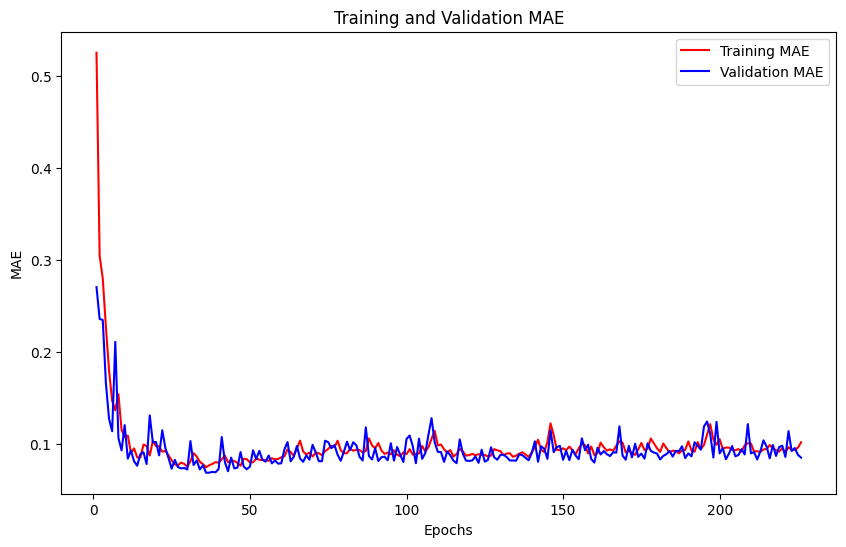

In [21]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [16]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [748.5763] Actual: [779.1] 
Durchschnittliche Abweichung (MAE): [40.42670317]


# GridSearch

In [18]:
from keras_tuner import RandomSearch

# Definieren der Funktion, die das Modell erstellt
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), input_shape=(2,), activation='relu'))
    # Hinzufügen von Schichten basierend auf dem Suchraum
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Erstellen des RandomSearch Objekts
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Anzahl der zu testenden Modellkonfigurationen
    executions_per_trial=1,  # Anzahl der Male, die jede Modellkonfiguration trainiert wird
    directory='random_search',  # Verzeichnis zur Speicherung der Suchlogs
    project_name='neural_network_optimization_D4'
)

# Durchführung des Random Search
tuner.search(X_train_scaled, y_train_scaled, epochs=20, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Abrufen des besten Modells
best_model = tuner.get_best_models(num_models=1)[0]

# Zusammenfassung des besten Modells
best_model.summary()

# Sie können auch die besten Hyperparameter direkt abrufen
best_hyperparameters = tuner.get_best_hyperparameters()[0]
print(best_hyperparameters.values)


Trial 100 Complete [00h 00m 23s]
val_loss: 0.0003458007122389972

Best val_loss So Far: 3.887327329721302e-05
Total elapsed time: 00h 31m 11s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               1344      
                                                                 
 dense_1 (Dense)             (None, 384)               172416    
                                                                 
 dense_2 (Dense)             (None, 96)                36960     
                                                                 
 dense_3 (Dense)             (None, 128)               12416     
                                                                 
 dense_4 (Dense)             (None, 320)               41280     
                                                                 
 dense_5 (Dense)             (None, 416)      